In [21]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
dhoogla_cicddos2019_path = kagglehub.dataset_download('dhoogla/cicddos2019')

print('Data source import complete.')

Data source import complete.


## Libraries

In [22]:
# Base Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.figure as fgr
from matplotlib.pyplot import figure
import seaborn as sns
import time
import os

# Data Analysis Libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler, MaxAbsScaler, LabelEncoder, OneHotEncoder, PowerTransformer
from sklearn.metrics import mean_squared_error,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split, RepeatedKFold, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import pylab
from scipy.stats import skew



#Ensemble Technique
from sklearn.ensemble import RandomForestClassifier

## Dataset

In [23]:
dfps_tr = []
dfps_ts = []
for dirname, _, filenames in os.walk(dhoogla_cicddos2019_path):
    print(f"Scanning directory: {dirname}")
    for filename in filenames:
        if filename.endswith('-training.parquet'):
            dfp = os.path.join(dirname, filename)
            dfps_tr.append(dfp)
            print(f"Training file found: {dfp}")
        elif filename.endswith('-testing.parquet'):
            dfp = os.path.join(dirname, filename)
            dfps_ts.append(dfp)
            print(f"Testing file found: {dfp}")


Scanning directory: C:\Users\Arjun Pratap\.cache\kagglehub\datasets\dhoogla\cicddos2019\versions\3
Testing file found: C:\Users\Arjun Pratap\.cache\kagglehub\datasets\dhoogla\cicddos2019\versions\3\DNS-testing.parquet
Testing file found: C:\Users\Arjun Pratap\.cache\kagglehub\datasets\dhoogla\cicddos2019\versions\3\LDAP-testing.parquet
Training file found: C:\Users\Arjun Pratap\.cache\kagglehub\datasets\dhoogla\cicddos2019\versions\3\LDAP-training.parquet
Testing file found: C:\Users\Arjun Pratap\.cache\kagglehub\datasets\dhoogla\cicddos2019\versions\3\MSSQL-testing.parquet
Training file found: C:\Users\Arjun Pratap\.cache\kagglehub\datasets\dhoogla\cicddos2019\versions\3\MSSQL-training.parquet
Testing file found: C:\Users\Arjun Pratap\.cache\kagglehub\datasets\dhoogla\cicddos2019\versions\3\NetBIOS-testing.parquet
Training file found: C:\Users\Arjun Pratap\.cache\kagglehub\datasets\dhoogla\cicddos2019\versions\3\NetBIOS-training.parquet
Testing file found: C:\Users\Arjun Pratap\.cache

In [24]:
train_df = pd.concat([pd.read_parquet(dfp) for dfp in dfps_tr], ignore_index=True)
test_df = pd.concat([pd.read_parquet(dfp) for dfp in dfps_ts], ignore_index=True)

In [25]:
train_df.to_csv('output.csv', index=False)

In [26]:
train_df.shape, test_df.shape

((125170, 78), (306201, 78))

In [27]:
train_df.head()

Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0        17             49                  2                       0   
1        17              1                  2                       0   
2        17              1                  2                       0   
3        17              1                  2                       0   
4        17              1                  2                       0   

   Fwd Packets Length Total  Bwd Packets Length Total  Fwd Packet Length Max  \
0                     458.0                       0.0                  229.0   
1                    2944.0                       0.0                 1472.0   
2                     458.0                       0.0                  229.0   
3                    2944.0                       0.0                 1472.0   
4                    2944.0                       0.0                 1472.0   

   Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  ...  \
0                  229.0                   229.0                    0.0  ...   
1                 1472.0                  1472.0                    0.0  ...   
2                  229.0                   229.0                    0.0  ...   
3                 1472.0                  1472.0                    0.0  ...   
4                 1472.0                  1472.0                    0.0  ...   

   Fwd Seg Size Min  Active Mean  Active Std  Active Max  Active Min  \
0                 8          0.0         0.0         0.0         0.0   
1              1480          0.0         0.0         0.0         0.0   
2                14          0.0         0.0         0.0         0.0   
3                14          0.0         0.0         0.0         0.0   
4                32          0.0         0.0         0.0         0.0   

   Idle Mean  Idle Std  Idle Max  Idle Min    Label  
0        0.0       0.0       0.0       0.0  NetBIOS  
1        0.0       0.0       0.0       0.0     LDAP  
2        0.0       0.0       0.0       0.0  NetBIOS  
3        0.0       0.0       0.0       0.0     LDAP  
4        0.0       0.0       0.0       0.0     LDAP  

[5 rows x 78 columns]

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125170 entries, 0 to 125169
Data columns (total 78 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Protocol                  125170 non-null  int8   
 1   Flow Duration             125170 non-null  int32  
 2   Total Fwd Packets         125170 non-null  int32  
 3   Total Backward Packets    125170 non-null  int16  
 4   Fwd Packets Length Total  125170 non-null  float32
 5   Bwd Packets Length Total  125170 non-null  float32
 6   Fwd Packet Length Max     125170 non-null  float32
 7   Fwd Packet Length Min     125170 non-null  float32
 8   Fwd Packet Length Mean    125170 non-null  float32
 9   Fwd Packet Length Std     125170 non-null  float32
 10  Bwd Packet Length Max     125170 non-null  float32
 11  Bwd Packet Length Min     125170 non-null  float32
 12  Bwd Packet Length Mean    125170 non-null  float32
 13  Bwd Packet Length Std     125170 non-null  f

In [29]:
train_df.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Fla

## Attributes

In [30]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_cat]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_cat: {len(cat_but_cat)}')
#     print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_cat


cat_cols, num_cols, cat_but_cat, = grab_col_names(train_df)
cat_cols, num_cols, cat_but_cat

Observations: 125170
Variables: 78
cat_cols: 20
num_cols: 58
cat_but_cat: 0


(['Label',
  'Protocol',
  'Fwd PSH Flags',
  'Bwd PSH Flags',
  'Fwd URG Flags',
  'Bwd URG Flags',
  'FIN Flag Count',
  'SYN Flag Count',
  'RST Flag Count',
  'PSH Flag Count',
  'ACK Flag Count',
  'URG Flag Count',
  'CWE Flag Count',
  'ECE Flag Count',
  'Fwd Avg Bytes/Bulk',
  'Fwd Avg Packets/Bulk',
  'Fwd Avg Bulk Rate',
  'Bwd Avg Bytes/Bulk',
  'Bwd Avg Packets/Bulk',
  'Bwd Avg Bulk Rate'],
 ['Flow Duration',
  'Total Fwd Packets',
  'Total Backward Packets',
  'Fwd Packets Length Total',
  'Bwd Packets Length Total',
  'Fwd Packet Length Max',
  'Fwd Packet Length Min',
  'Fwd Packet Length Mean',
  'Fwd Packet Length Std',
  'Bwd Packet Length Max',
  'Bwd Packet Length Min',
  'Bwd Packet Length Mean',
  'Bwd Packet Length Std',
  'Flow Bytes/s',
  'Flow Packets/s',
  'Flow IAT Mean',
  'Flow IAT Std',
  'Flow IAT Max',
  'Flow IAT Min',
  'Fwd IAT Total',
  'Fwd IAT Mean',
  'Fwd IAT Std',
  'Fwd IAT Max',
  'Fwd IAT Min',
  'Bwd IAT Total',
  'Bwd IAT Mean',
  'Bwd I

In [31]:
for i in cat_cols:
    print(i, train_df[i].unique())

Label ['NetBIOS' 'LDAP' 'Benign' 'MSSQL' 'Portmap' 'Syn' 'UDP' 'UDPLag']
Protocol [17  6  0]
Fwd PSH Flags [0 1]
Bwd PSH Flags [0]
Fwd URG Flags [0]
Bwd URG Flags [0]
FIN Flag Count [0]
SYN Flag Count [0 1]
RST Flag Count [0 1]
PSH Flag Count [0]
ACK Flag Count [0 1]
URG Flag Count [0 1]
CWE Flag Count [0 1]
ECE Flag Count [0]
Fwd Avg Bytes/Bulk [0]
Fwd Avg Packets/Bulk [0]
Fwd Avg Bulk Rate [0]
Bwd Avg Bytes/Bulk [0]
Bwd Avg Packets/Bulk [0]
Bwd Avg Bulk Rate [0]


## Missing Values

In [32]:
for i in train_df.columns:
    print(i, train_df[i].isnull().sum())

Protocol 0
Flow Duration 0
Total Fwd Packets 0
Total Backward Packets 0
Fwd Packets Length Total 0
Bwd Packets Length Total 0
Fwd Packet Length Max 0
Fwd Packet Length Min 0
Fwd Packet Length Mean 0
Fwd Packet Length Std 0
Bwd Packet Length Max 0
Bwd Packet Length Min 0
Bwd Packet Length Mean 0
Bwd Packet Length Std 0
Flow Bytes/s 0
Flow Packets/s 0
Flow IAT Mean 0
Flow IAT Std 0
Flow IAT Max 0
Flow IAT Min 0
Fwd IAT Total 0
Fwd IAT Mean 0
Fwd IAT Std 0
Fwd IAT Max 0
Fwd IAT Min 0
Bwd IAT Total 0
Bwd IAT Mean 0
Bwd IAT Std 0
Bwd IAT Max 0
Bwd IAT Min 0
Fwd PSH Flags 0
Bwd PSH Flags 0
Fwd URG Flags 0
Bwd URG Flags 0
Fwd Header Length 0
Bwd Header Length 0
Fwd Packets/s 0
Bwd Packets/s 0
Packet Length Min 0
Packet Length Max 0
Packet Length Mean 0
Packet Length Std 0
Packet Length Variance 0
FIN Flag Count 0
SYN Flag Count 0
RST Flag Count 0
PSH Flag Count 0
ACK Flag Count 0
URG Flag Count 0
CWE Flag Count 0
ECE Flag Count 0
Down/Up Ratio 0
Avg Packet Size 0
Avg Fwd Segment Size 0
Avg Bw

# EDA

## Categorical Columns

         Label      Ratio
Label                    
Syn      48840  39.018934
Benign   46427  37.091156
UDP      18090  14.452345
MSSQL     8523   6.809140
LDAP      1906   1.522729
Portmap    685   0.547256
NetBIOS    644   0.514500
UDPLag      55   0.043940


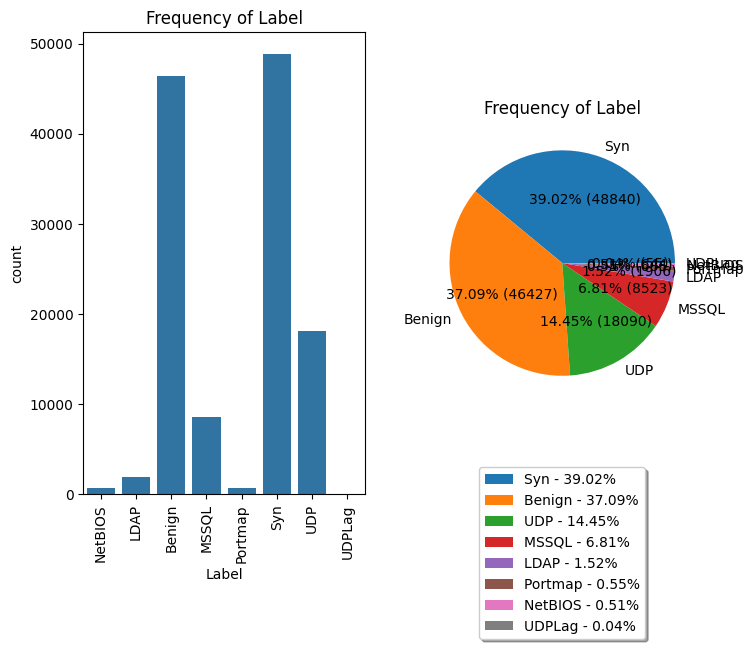

          Protocol      Ratio
Protocol                     
6            79530  63.537589
17           44814  35.802509
0              826   0.659903


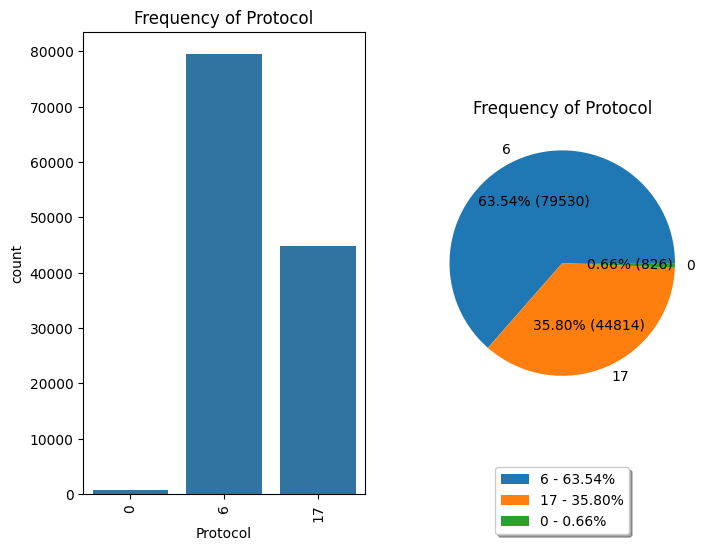

               Fwd PSH Flags     Ratio
Fwd PSH Flags                         
0                     118967  95.04434
1                       6203   4.95566


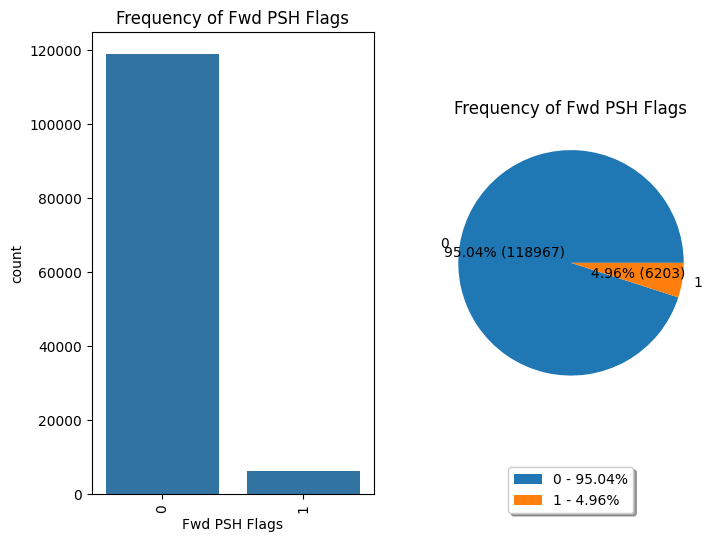

               Bwd PSH Flags  Ratio
Bwd PSH Flags                      
0                     125170  100.0


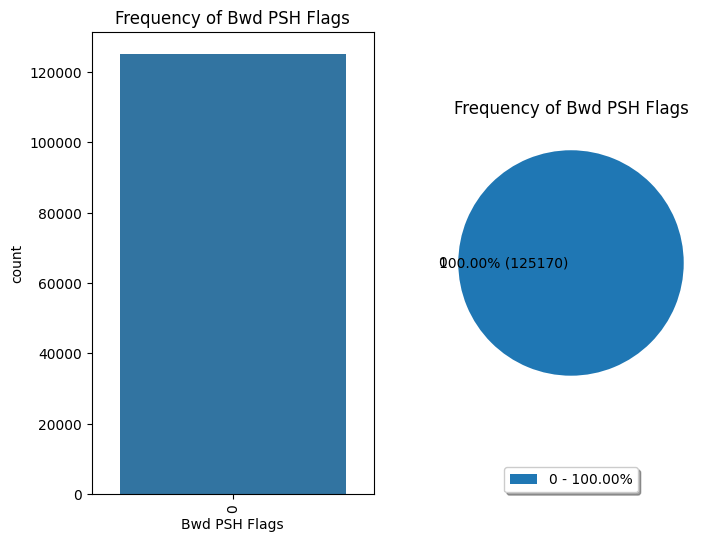

               Fwd URG Flags  Ratio
Fwd URG Flags                      
0                     125170  100.0


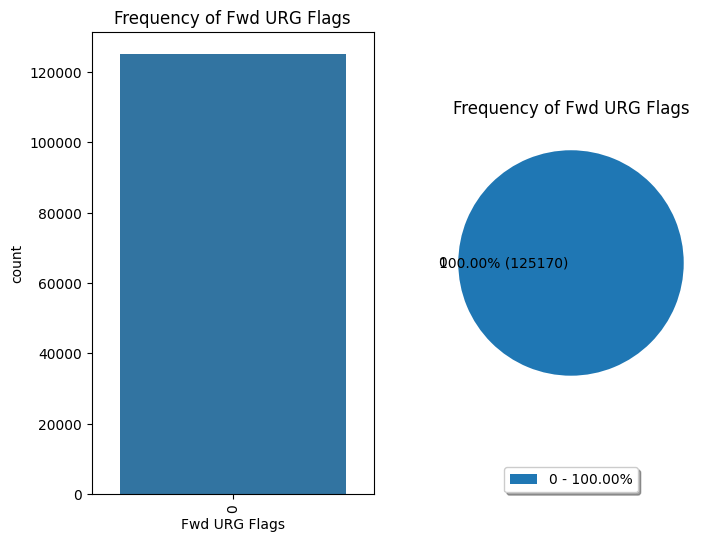

               Bwd URG Flags  Ratio
Bwd URG Flags                      
0                     125170  100.0


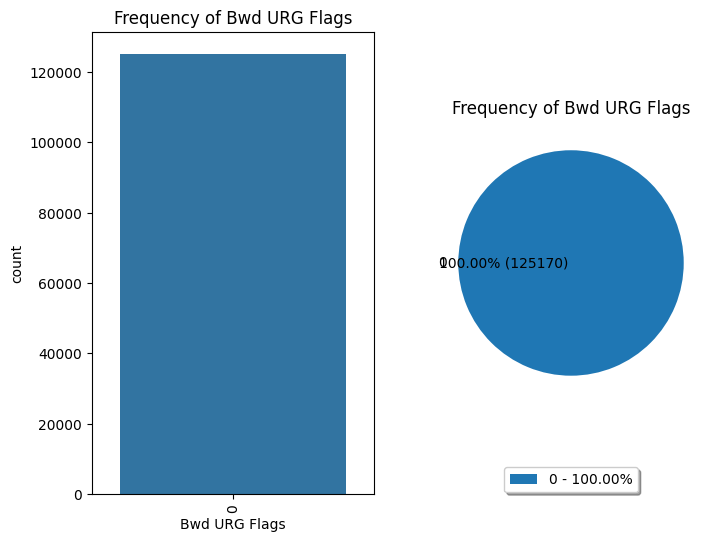

                FIN Flag Count  Ratio
FIN Flag Count                       
0                       125170  100.0


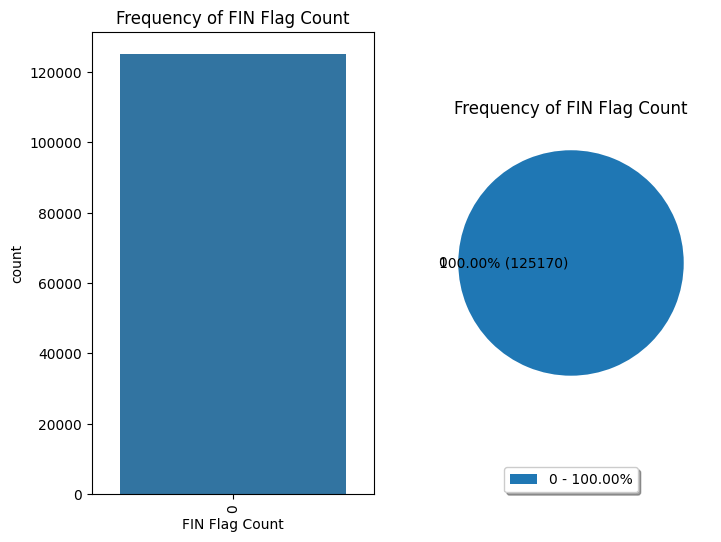

                SYN Flag Count      Ratio
SYN Flag Count                           
0                       125042  99.897739
1                          128   0.102261


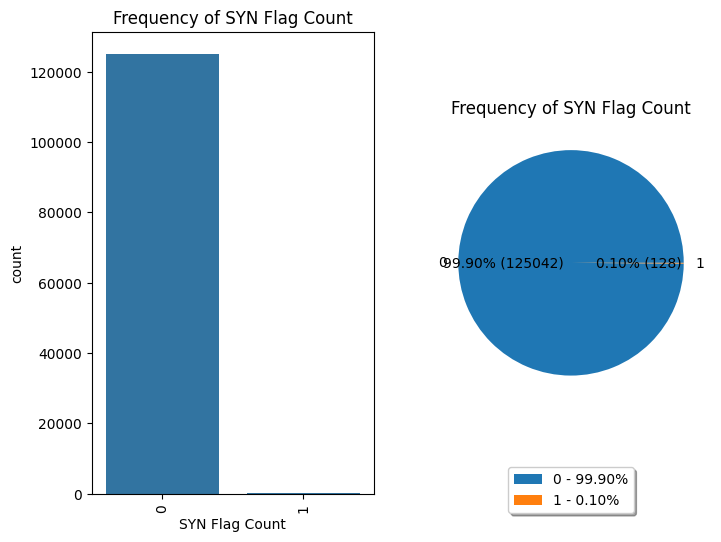

                RST Flag Count     Ratio
RST Flag Count                          
0                       118967  95.04434
1                         6203   4.95566


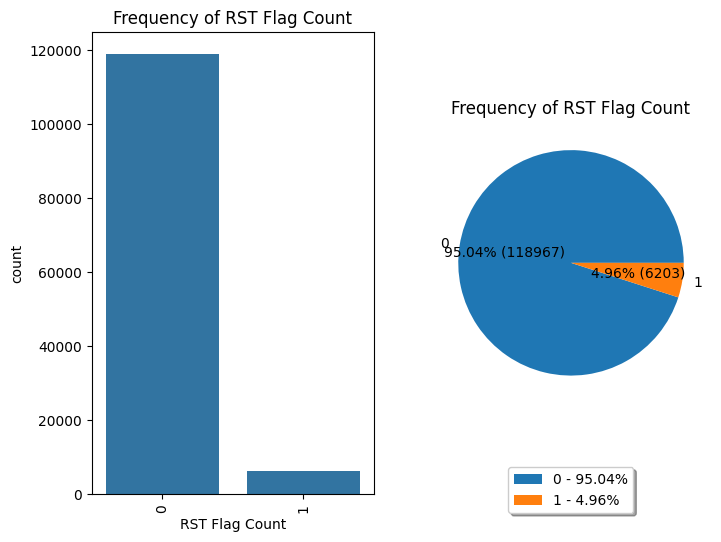

                PSH Flag Count  Ratio
PSH Flag Count                       
0                       125170  100.0


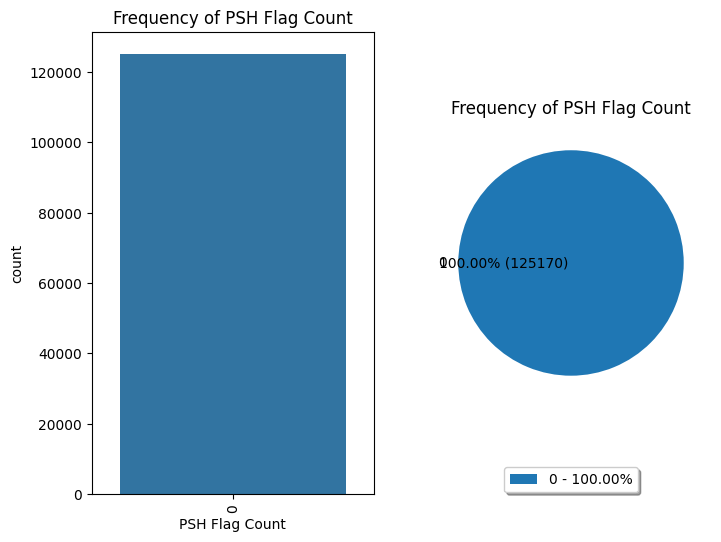

                ACK Flag Count      Ratio
ACK Flag Count                           
0                        66222  52.905648
1                        58948  47.094352


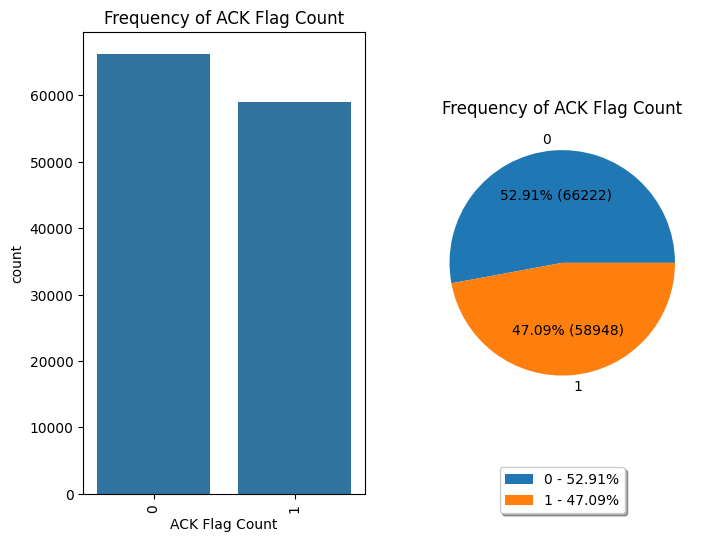

                URG Flag Count      Ratio
URG Flag Count                           
0                       104592  83.559958
1                        20578  16.440042


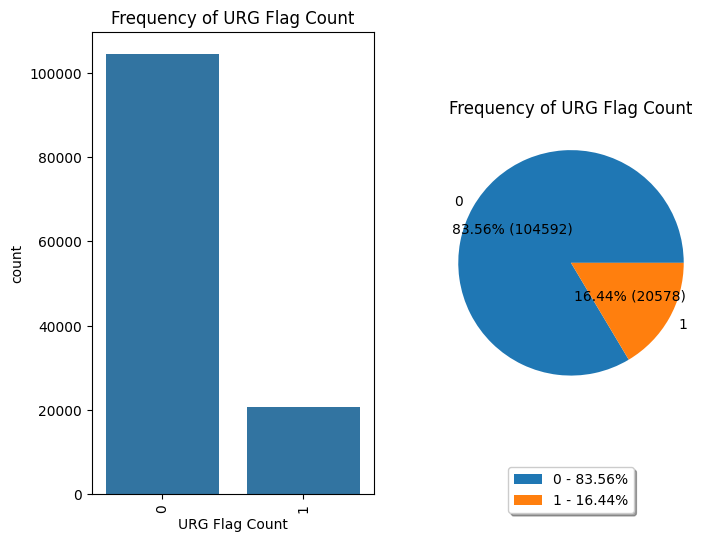

                CWE Flag Count      Ratio
CWE Flag Count                           
0                       114878  91.777582
1                        10292   8.222418


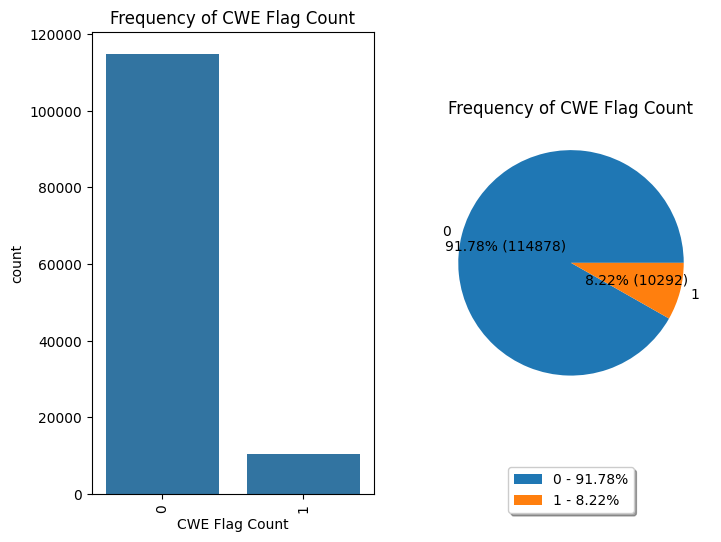

                ECE Flag Count  Ratio
ECE Flag Count                       
0                       125170  100.0


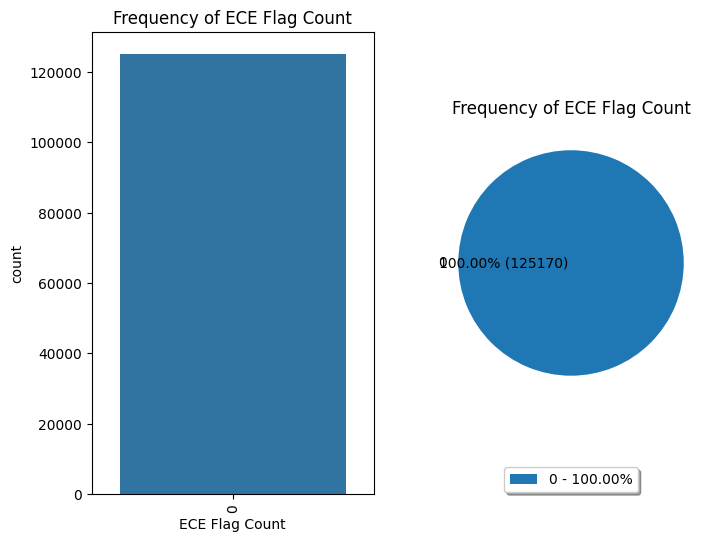

                    Fwd Avg Bytes/Bulk  Ratio
Fwd Avg Bytes/Bulk                           
0                               125170  100.0


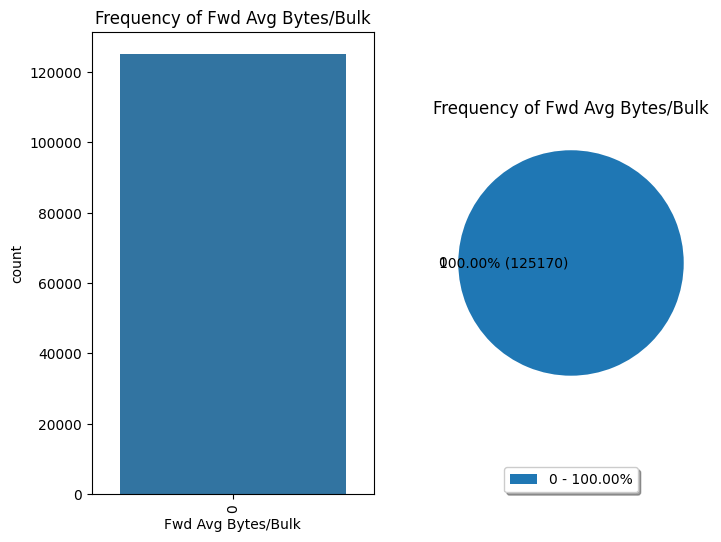

                      Fwd Avg Packets/Bulk  Ratio
Fwd Avg Packets/Bulk                             
0                                   125170  100.0


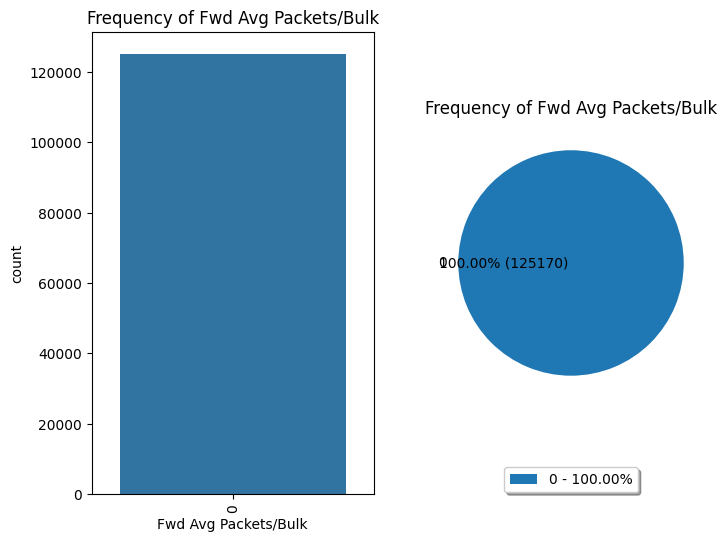

                   Fwd Avg Bulk Rate  Ratio
Fwd Avg Bulk Rate                          
0                             125170  100.0


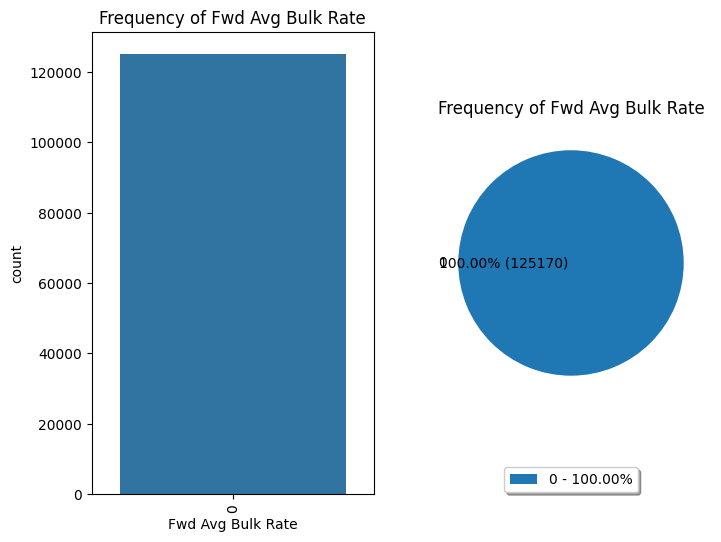

                    Bwd Avg Bytes/Bulk  Ratio
Bwd Avg Bytes/Bulk                           
0                               125170  100.0


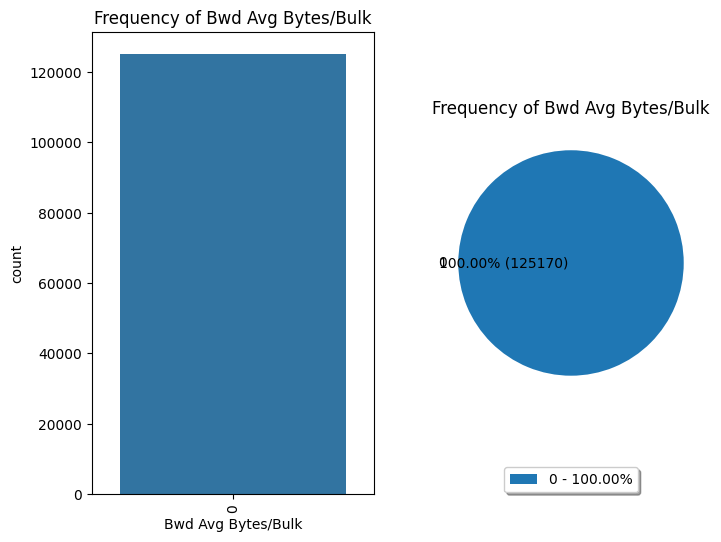

                      Bwd Avg Packets/Bulk  Ratio
Bwd Avg Packets/Bulk                             
0                                   125170  100.0


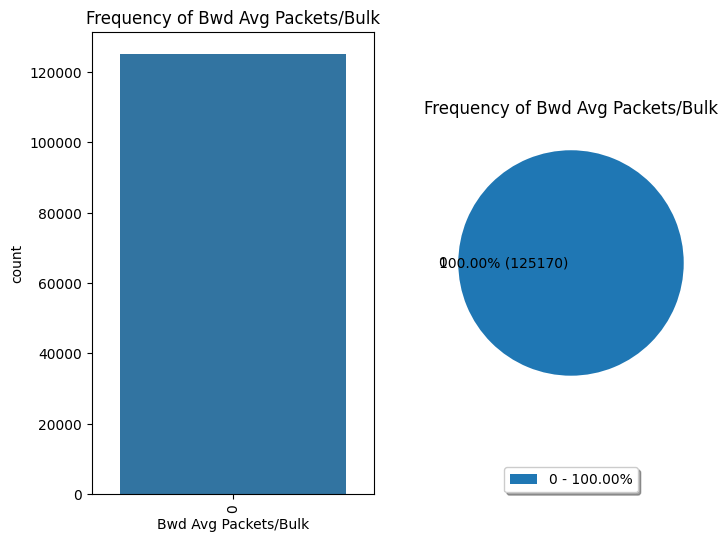

                   Bwd Avg Bulk Rate  Ratio
Bwd Avg Bulk Rate                          
0                             125170  100.0


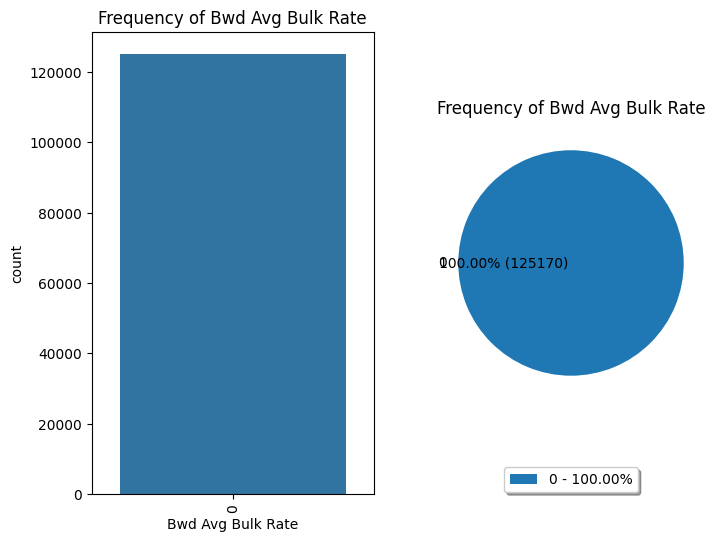

In [33]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(train_df, col, True)

## Numerical Columns

In [34]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress the specific UserWarning for distplot deprecation
warnings.filterwarnings("ignore", category=UserWarning, message=".*distplot.*")
# Distribution Plots:
def my_histplot(df, col, ax):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Histogram Plot of {col}')
def my_distplot(df, col, ax):
    sns.distplot(df[col], ax=ax)
    ax.set_title(f'Distribution Plot of {col}')
def my_kdeplot(df, col, ax):
    sns.kdeplot(df[col], ax=ax, fill=True)
    ax.set_title(f'KDE Plot of {col}')

# Relational Plots:
def my_scatterplot(df, col, ax):
    sns.scatterplot(df[col], ax=ax)
    ax.set_title(f'Scatter Plot of {col}')
def my_lineplot(df, col, ax):
    sns.lineplot(df[col], ax=ax)
    ax.set_title(f'Line Plot of {col}')

# Categorical Plots:
def my_pie_chart(df, col, ax):
    labels = df[col].value_counts()
    ax.pie(labels, labels=labels.index, autopct='%1.1f%%')
    ax.set_title(f'Pie Chart of {col}')
def my_countplot(df, col, ax):
    sns.countplot(x=df[col], ax=ax)
    ax.set_title(f'Count Plot of {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
def my_boxplot(df, col, ax):
    sns.boxplot(y=df[col], ax=ax)
def my_violinplot(df, col, ax):
    sns.violinplot(y=df[col], ax=ax)

# Matrix Plots:
def my_heatmap(df, size):
    if size: plt.figure(figsize=size)
    sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap='Blues', annot_kws={"size": 12})
    plt.title('Correlation Heatmap')
    plt.show()

#vsplot
def my_vsplot(df, normal_col, label_col):
    plt.figure(figsize=(10, 6), dpi=80)
    plt.bar(list(dict(df[normal_col].value_counts()).keys()), dict(df[normal_col].value_counts()).values(), color='r')
    plt.bar(list(dict(df[normal_col][df[label_col] == 1].value_counts()).keys()), dict(df[normal_col][df[label_col] == 1].value_counts()).values(), color='b')

    plt.xlabel(normal_col)
    plt.ylabel('Count')
    plt.legend(['All', label_col])
    # plt.title('The number of requests from different protocols')

def plot_charts_grid_single_feature(df, plot_func, size=(12, 4), n_col=1):
    if len(df.columns) == 0:
        return
    n_rows = (len(df.columns) + n_col-1) // n_col
    fig, axes = plt.subplots(n_rows, n_col, figsize=(size[0]*n_col, size[1]*n_rows))
    if len(df.columns) == 1:
        axes = np.array([axes])
    axes = axes.flatten()

    for i, label in enumerate(df.columns):
        plot_func(df, label, axes[i])
        axes[i].set_xlabel(label)

    for j in range(i+1, n_rows*n_col):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

C:\Users\Arjun Pratap\AppData\Local\Temp\ipykernel_20028\3855774090.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax)
C:\Users\Arjun Pratap\AppData\Local\Temp\ipykernel_20028\3855774090.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax)
C:\Users\Arjun Pratap\

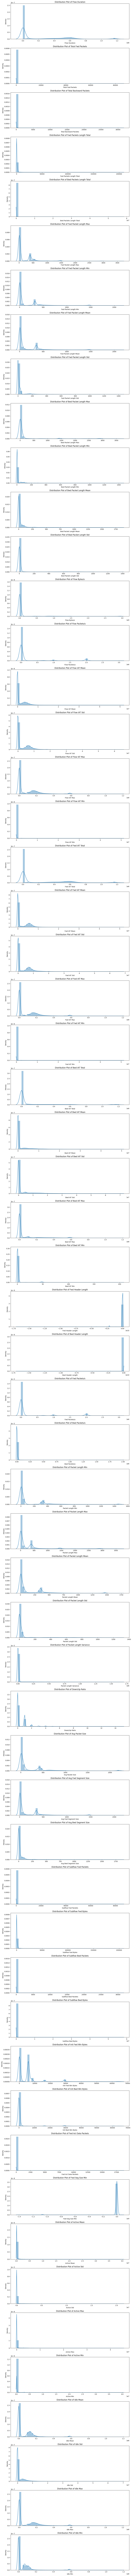

In [35]:
plot_charts_grid_single_feature(train_df[num_cols], my_distplot)

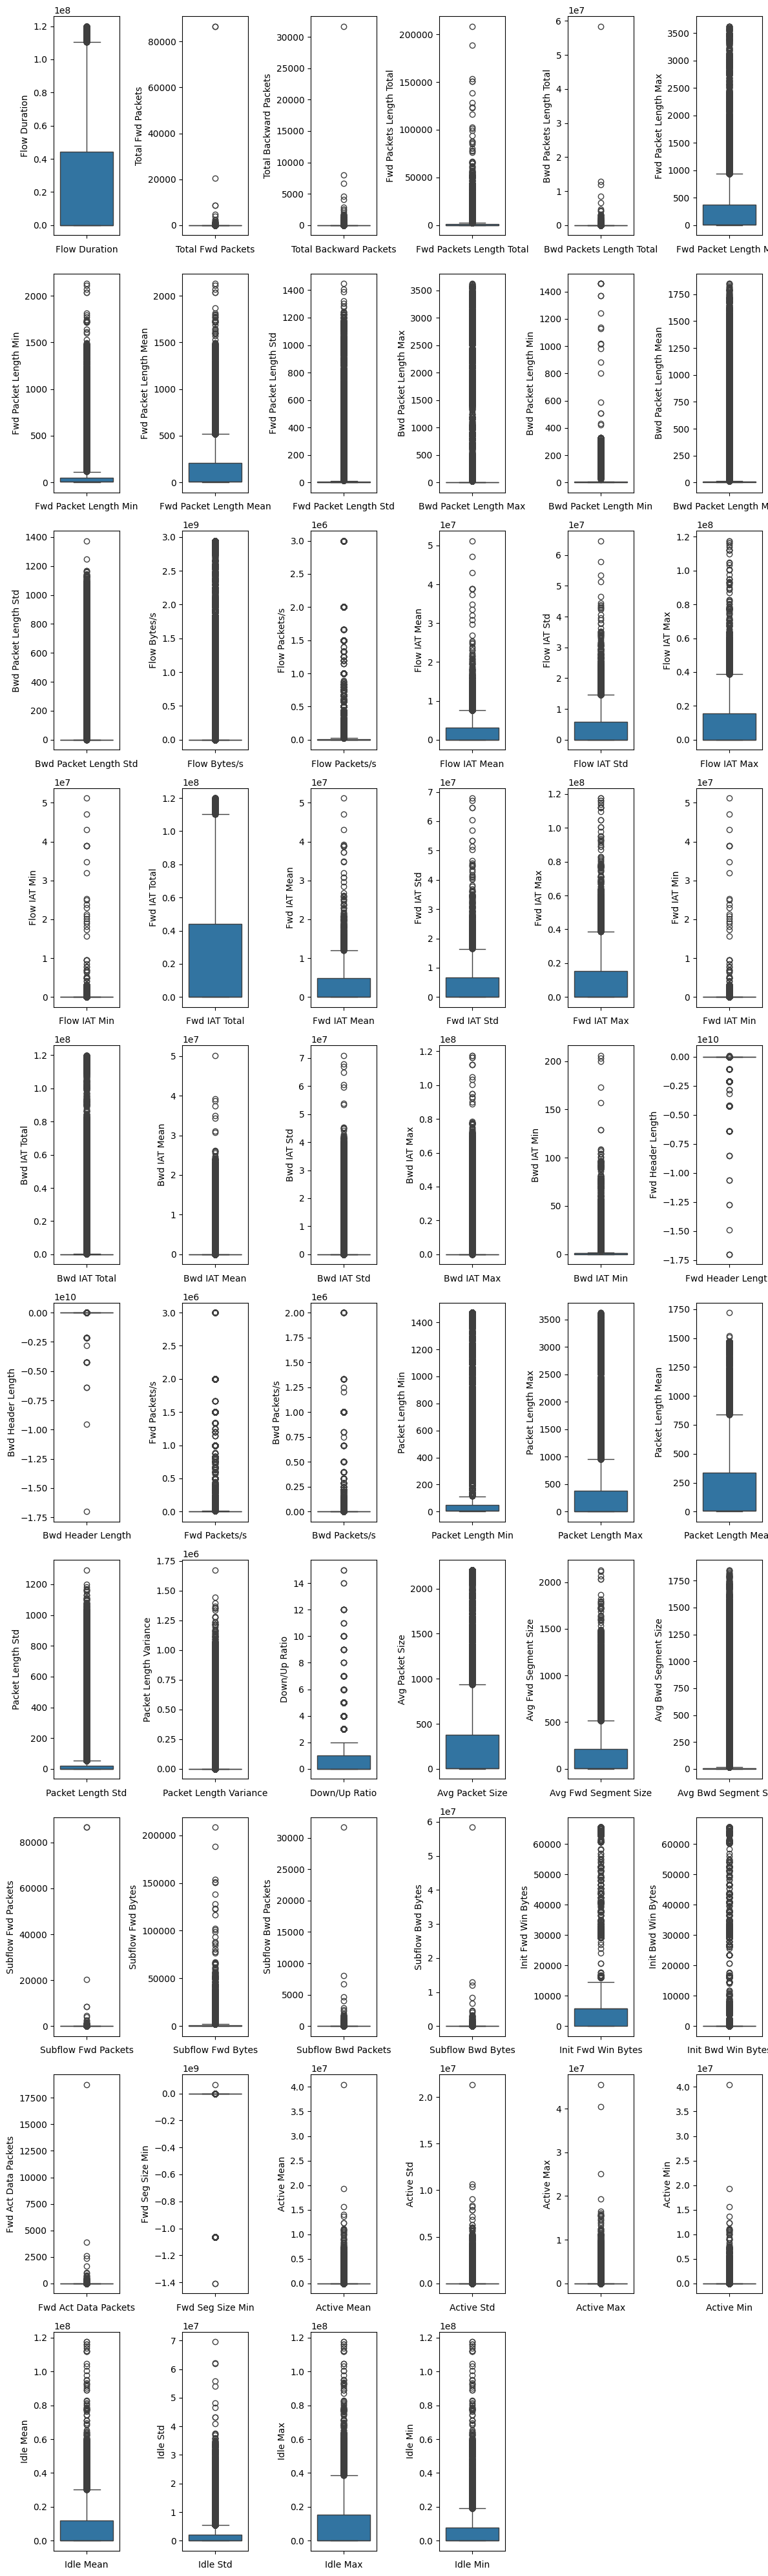

In [36]:
plot_charts_grid_single_feature(train_df[num_cols], my_boxplot, size=(2, 4), n_col=6)

## Packet Size and Flow Duration Analysis

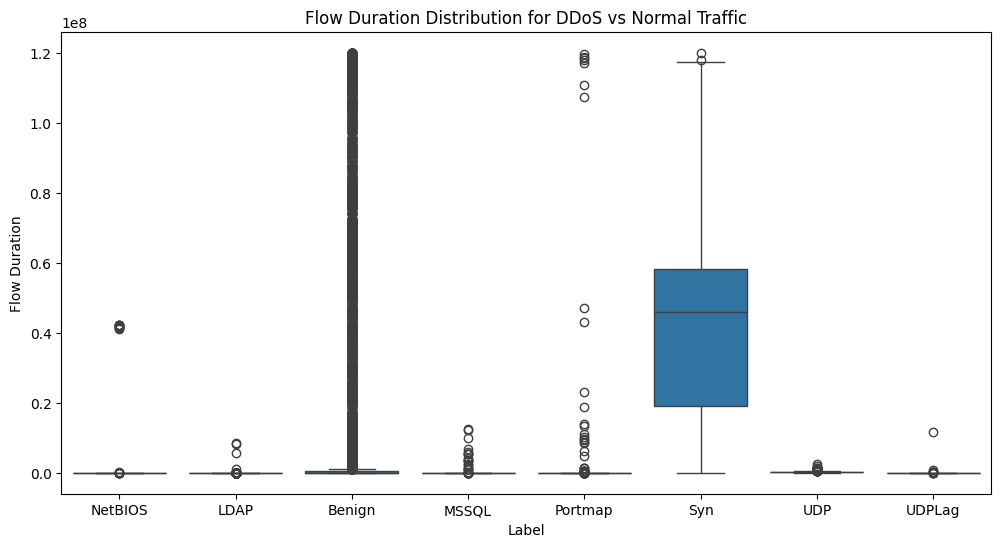

In [37]:
# Boxplot of Flow Duration by Attack Label
plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='Flow Duration', data=train_df)
plt.title('Flow Duration Distribution for DDoS vs Normal Traffic')
plt.show()



## Packet Flags and Attack Patterns

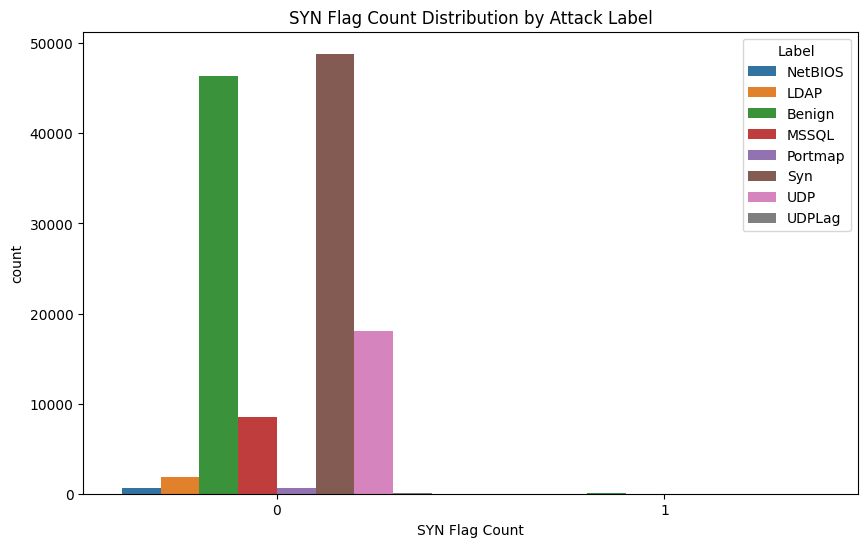

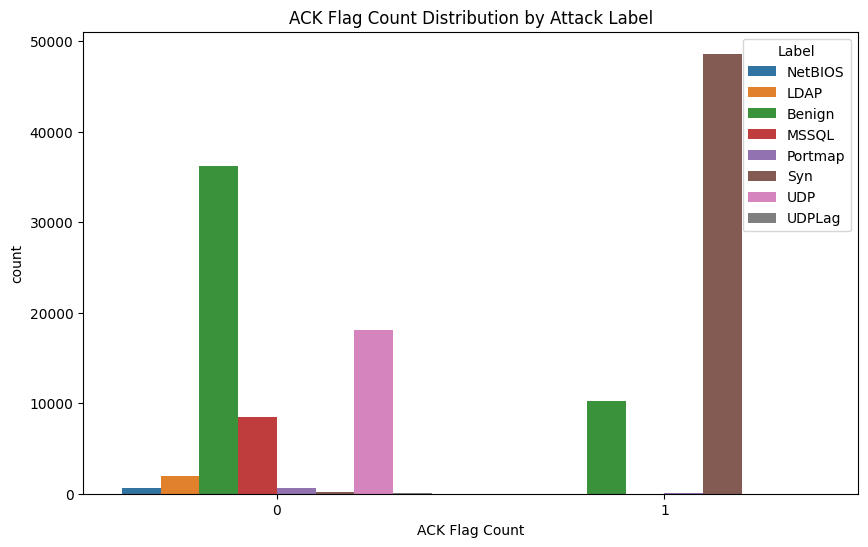

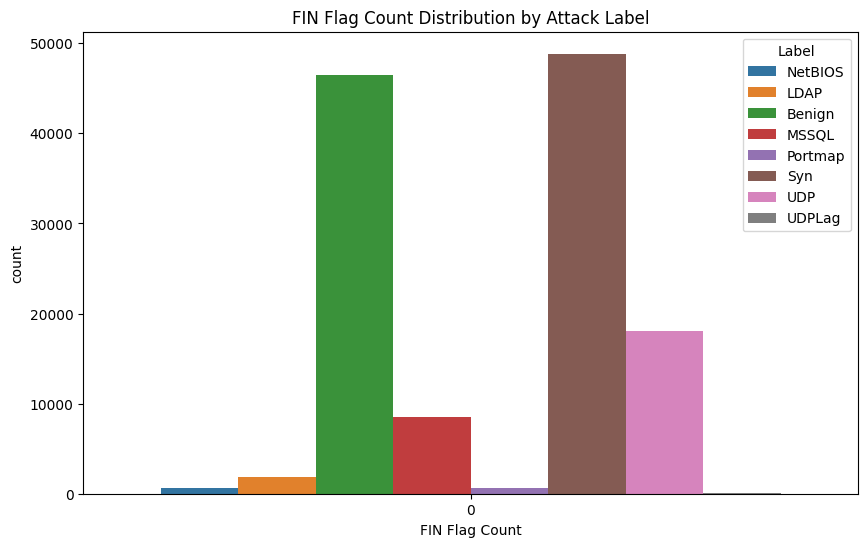

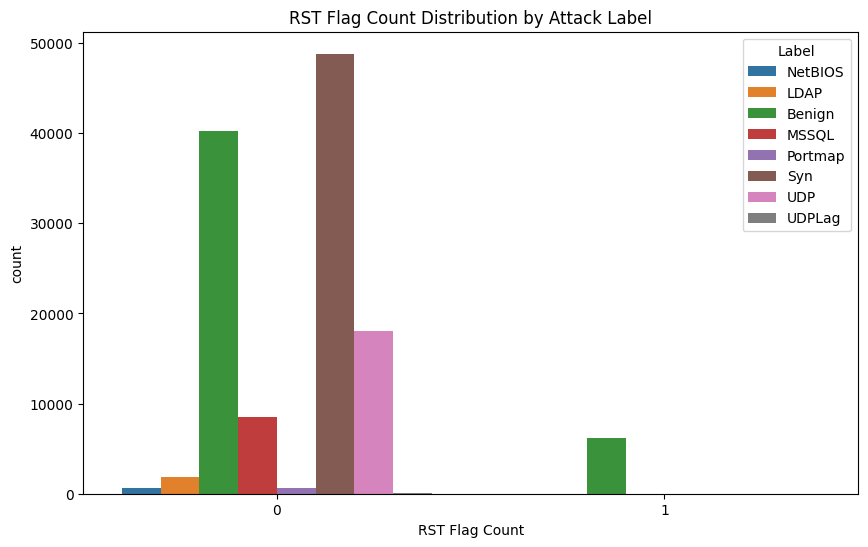

In [38]:
# Counting the number of occurrences of each flag in attacks vs normal traffic
flag_columns = ['SYN Flag Count', 'ACK Flag Count', 'FIN Flag Count', 'RST Flag Count']

for flag in flag_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=flag, hue='Label', data=train_df)
    plt.title(f'{flag} Distribution by Attack Label')
    plt.show()


## Visualization of Flow and Packet Trends

## Correlation

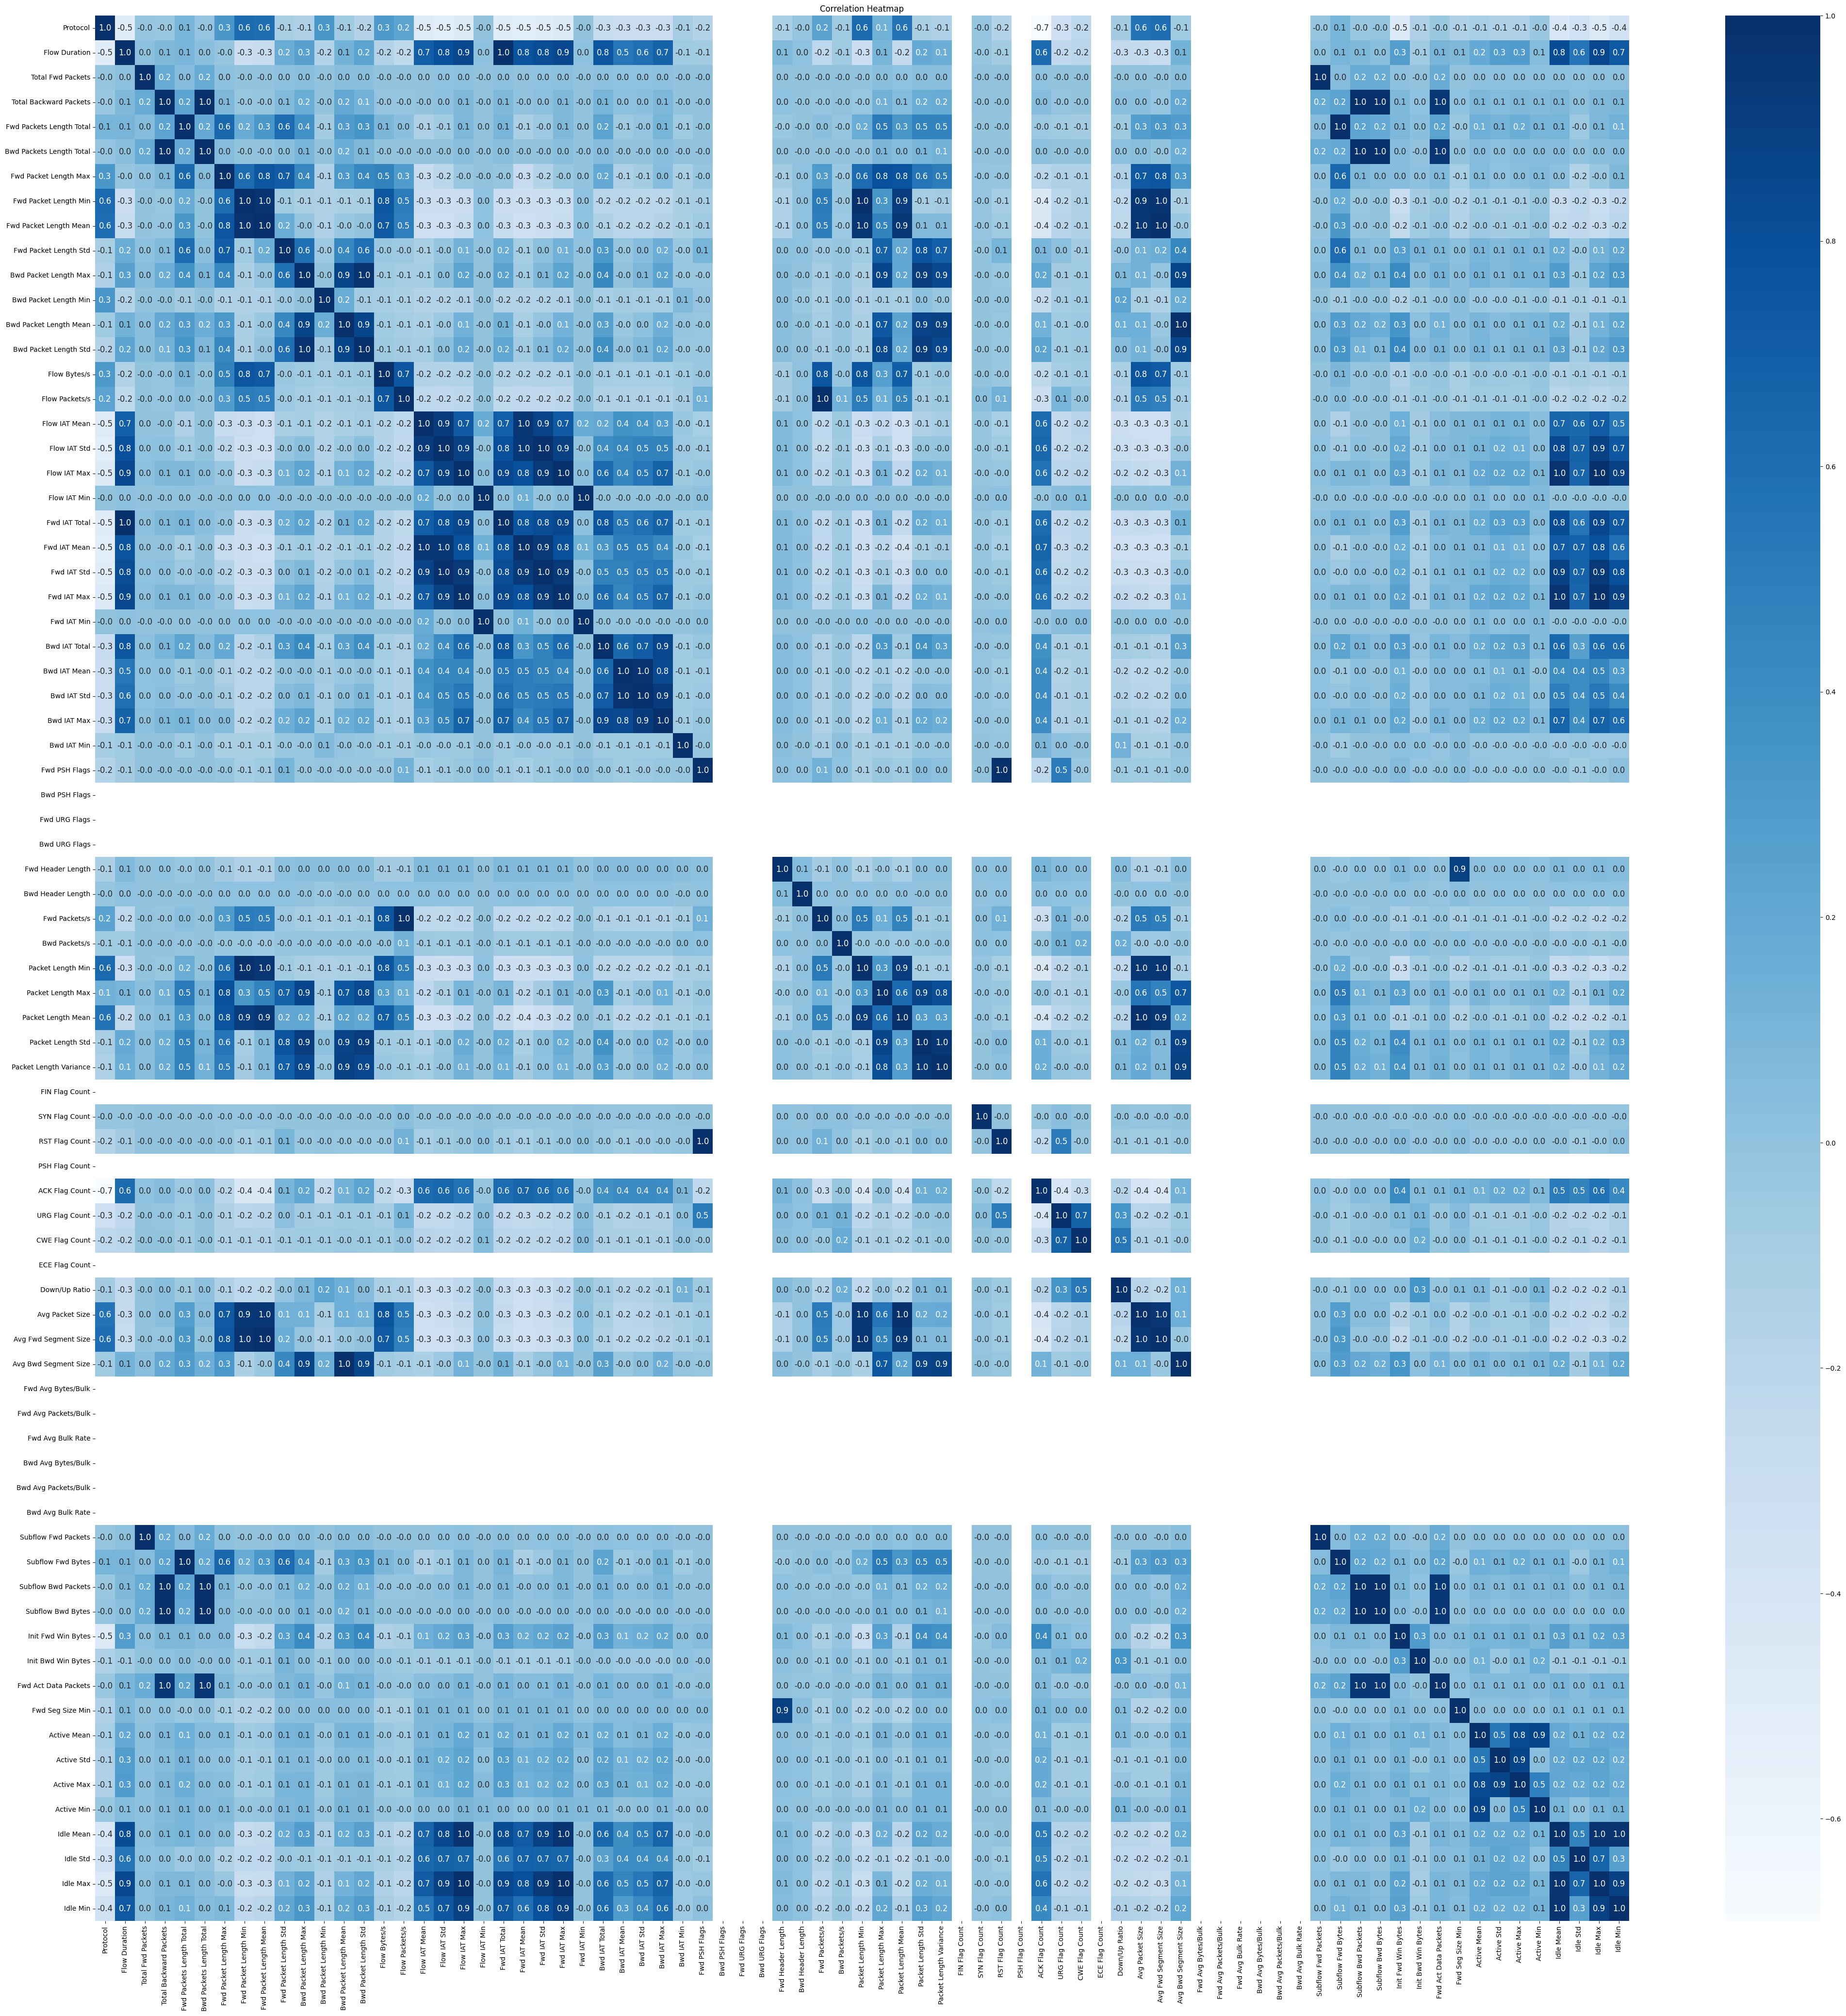

In [39]:
n_numeric_cols = len(train_df.select_dtypes(include=[np.number]).columns) // 3 * 2
my_heatmap(train_df.select_dtypes(include=[np.number]), size=(n_numeric_cols+1, n_numeric_cols+1))

# Feature Engineering

## Feature Selection

In [40]:
remove_cols = ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count', 'Fwd Avg Bytes/Bulk',
'Fwd Avg Packets/Bulk',
'Fwd Avg Bulk Rate',
'Bwd Avg Bytes/Bulk',
'Bwd Avg Packets/Bulk',
'Bwd Avg Bulk Rate', 'ECE Flag Count', 'PSH Flag Count']

In [41]:
train_df.drop(remove_cols, axis=1, inplace=True)

In [42]:
# Select only numerical columns
numerical_df = train_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr().abs()

# Generate a boolean mask for the upper triangle
mask = np.triu(np.ones(corr_matrix.shape), k=1) == 1

# Select the upper triangle of the correlation matrix
upper_tri = corr_matrix.where(mask)

# Find the columns with a high correlation of 0.8 or higher
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

# Drop the columns with a high correlation
numerical_df.drop(to_drop, axis=1, inplace=True)

In [43]:
to_drop

['Bwd Packets Length Total',
 'Fwd Packet Length Mean',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow IAT Std',
 'Flow IAT Max',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Fwd Packets/s',
 'Packet Length Min',
 'Packet Length Max',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'RST Flag Count',
 'Avg Packet Size',
 'Avg Fwd Segment Size',
 'Avg Bwd Segment Size',
 'Subflow Fwd Packets',
 'Subflow Fwd Bytes',
 'Subflow Bwd Packets',
 'Subflow Bwd Bytes',
 'Fwd Act Data Packets',
 'Fwd Seg Size Min',
 'Active Max',
 'Active Min',
 'Idle Mean',
 'Idle Max',
 'Idle Min']

In [44]:
remove_col1 = ['Bwd Packets Length Total',
 'Fwd Packet Length Mean',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow IAT Std',
 'Flow IAT Max',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Fwd Packets/s',
 'Packet Length Min',
 'Packet Length Max',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'RST Flag Count',
 'Avg Packet Size',
 'Avg Fwd Segment Size',
 'Avg Bwd Segment Size',
 'Subflow Fwd Packets',
 'Subflow Fwd Bytes',
 'Subflow Bwd Packets',
 'Subflow Bwd Bytes',
 'Fwd Act Data Packets',
 'Fwd Seg Size Min',
 'Active Max',
 'Active Min',
 'Idle Mean',
 'Idle Max',
 'Idle Min']

In [45]:
train_df.drop(remove_col1, axis=1, inplace=True)

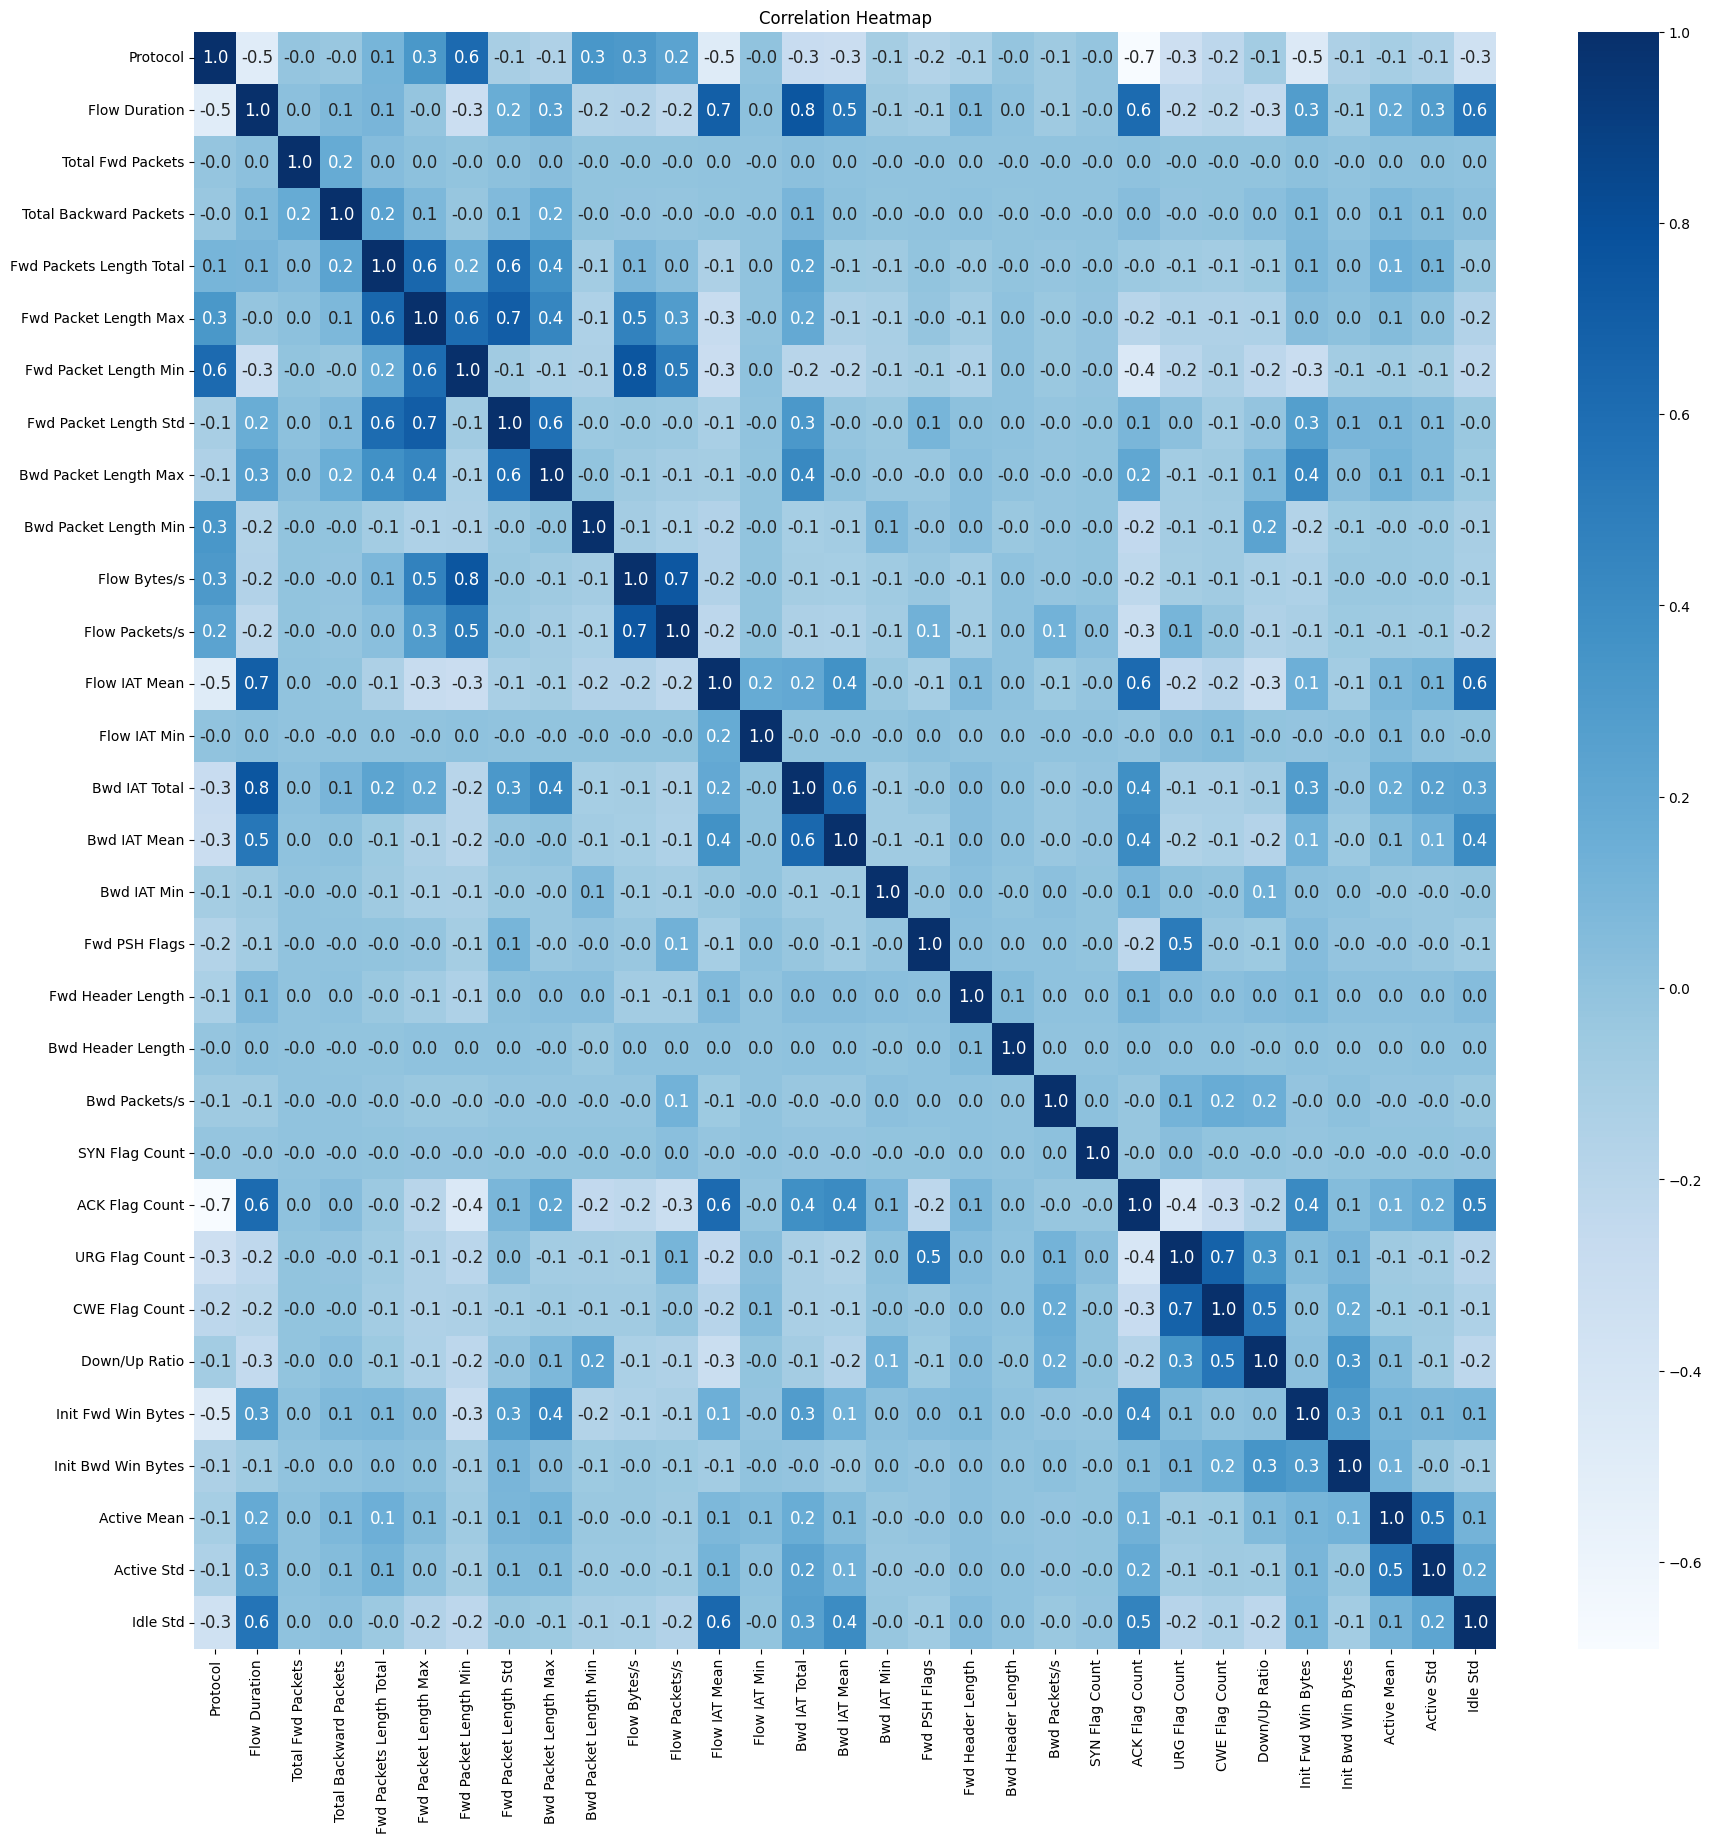

In [46]:
n_numeric_cols = len(train_df.select_dtypes(include=[np.number]).columns) // 3 * 2
my_heatmap(train_df.select_dtypes(include=[np.number]), size=(n_numeric_cols+1, n_numeric_cols+1))

In [47]:
train_df.head()

Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0        17             49                  2                       0   
1        17              1                  2                       0   
2        17              1                  2                       0   
3        17              1                  2                       0   
4        17              1                  2                       0   

   Fwd Packets Length Total  Fwd Packet Length Max  Fwd Packet Length Min  \
0                     458.0                  229.0                  229.0   
1                    2944.0                 1472.0                 1472.0   
2                     458.0                  229.0                  229.0   
3                    2944.0                 1472.0                 1472.0   
4                    2944.0                 1472.0                 1472.0   

   Fwd Packet Length Std  Bwd Packet Length Max  Bwd Packet Length Min  ...  \
0                    0.0                    0.0                    0.0  ...   
1                    0.0                    0.0                    0.0  ...   
2                    0.0                    0.0                    0.0  ...   
3                    0.0                    0.0                    0.0  ...   
4                    0.0                    0.0                    0.0  ...   

   ACK Flag Count  URG Flag Count  CWE Flag Count  Down/Up Ratio  \
0               0               0               0            0.0   
1               0               0               0            0.0   
2               0               0               0            0.0   
3               0               0               0            0.0   
4               0               0               0            0.0   

   Init Fwd Win Bytes  Init Bwd Win Bytes  Active Mean  Active Std  Idle Std  \
0                  -1                  -1          0.0         0.0       0.0   
1                  -1                  -1          0.0         0.0       0.0   
2                  -1                  -1          0.0         0.0       0.0   
3                  -1                  -1          0.0         0.0       0.0   
4                  -1                  -1          0.0         0.0       0.0   

     Label  
0  NetBIOS  
1     LDAP  
2  NetBIOS  
3     LDAP  
4     LDAP  

[5 rows x 32 columns]

## Splitting

In [48]:

from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Check the encoded labels
print(np.unique(y_encoded))  # The integer-encoded labels




NameError: name 'y' is not defined

In [ ]:
X = train_df.drop(columns='Label')
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# MODELS

## Random Classifier


In [ ]:


# Step 3: Feature Scaling (optional, for models sensitive to scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Initialize and Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Step 5: Evaluate the Model
y_pred = rf_model.predict(X_test_scaled)
print("Initial Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))




## decision tree


In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a Decision Tree Classifier
print("\nTraining Decision Tree...")
dt_model = DecisionTreeClassifier(
    max_depth=10,  # You can tune this hyperparameter
    random_state=42
)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("\nDecision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))



## Logistic regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Multinomial Logistic Regression
print("\nTraining Logistic Regression...")
logreg_model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',  # Solver for multinomial logistic regression
    max_iter=1000,
    random_state=42
)
logreg_model.fit(X_train_scaled, y_train)

# Predict
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Evaluate
print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

## hypertuning


In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Objective function for Random Forest hyperparameter tuning
def objective_rf(trial):
    # Define hyperparameter space, excluding 'auto' for max_features
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])  # Exclude 'auto'

    # Initialize RandomForestClassifier with trial parameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_scaled)
    return f1_score(y_test, y_pred, average='weighted')  # You can use 'accuracy' as well

# Run the Optuna study for Random Forest with 10 trials
study_rf = optuna.create_study(direction='maximize')  # We aim to maximize the F1 score
study_rf.optimize(objective_rf, n_trials=10)  # Only 10 trials

# Print the best hyperparameters
print("Best hyperparameters found by Optuna:")
print(study_rf.best_params)


In [ ]:
# Train the final Random Forest Classifier using the best hyperparameters
rf_final_model = RandomForestClassifier(
    n_estimators=914,
    max_depth=17,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=None,
    random_state=42
)

# Fit the model
rf_final_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_final = rf_final_model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Final Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_final))